# Portfolio Optimization with Markowitz Model

In any investment strategy, there's always a tradeoff between risk and return. Investors strive for maximum returns while keeping risk at a manageable level. According to research, risk and return shouldn't be viewed independently; the higher the risk, the greater the expected profit. Markowitz Portfolio Optimization (MPO) addresses this balance by assigning asset weights to optimize returns given a specific level of risk tolerance.

This project demonstrates two approaches to asset allocation and portfolio optimization:
1. **Monte Carlo Simulation** – randomly assigning weights to assets and simulating returns and risks.
2. **SciPy Optimization** – directly optimizing the Sharpe Ratio to achieve the maximum return for a given level of risk.

Below is the code used for this analysis, accompanied by key visualizations.

In [13]:
# Part 1: Importing Libraries and Loading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

# Load data
file_path = r'R:\Portfolio_optimalization\akcje.txt'  # Adjust path if needed
data = pd.read_csv(file_path, sep=';', header=None)
data.columns = ['Day'] + [f'Stock_{i+1}' for i in range(data.shape[1] - 1)]
data.set_index('Day', inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric if necessary

# Display the first few rows of data
data.head()


,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,Stock_11
Day,,,,,,,,,,,
1,3.25,12.7,71.5,11.4,4.5,35.2,6.8,26.3,17.1,33.20,0.67
2,3.25,12.9,73.0,11.6,4.5,34.9,7.2,25.4,17.1,33.54,0.68
3,3.20,12.8,74.5,12.0,4.5,34.9,7.1,24.4,16.9,33.20,0.68
4,3.15,13.0,72.5,12.0,4.5,34.7,7.0,24.0,17.2,33.02,0.67
5,3.25,13.0,75.0,11.6,4.3,34.7,6.9,22.4,16.8,35.26,0.65


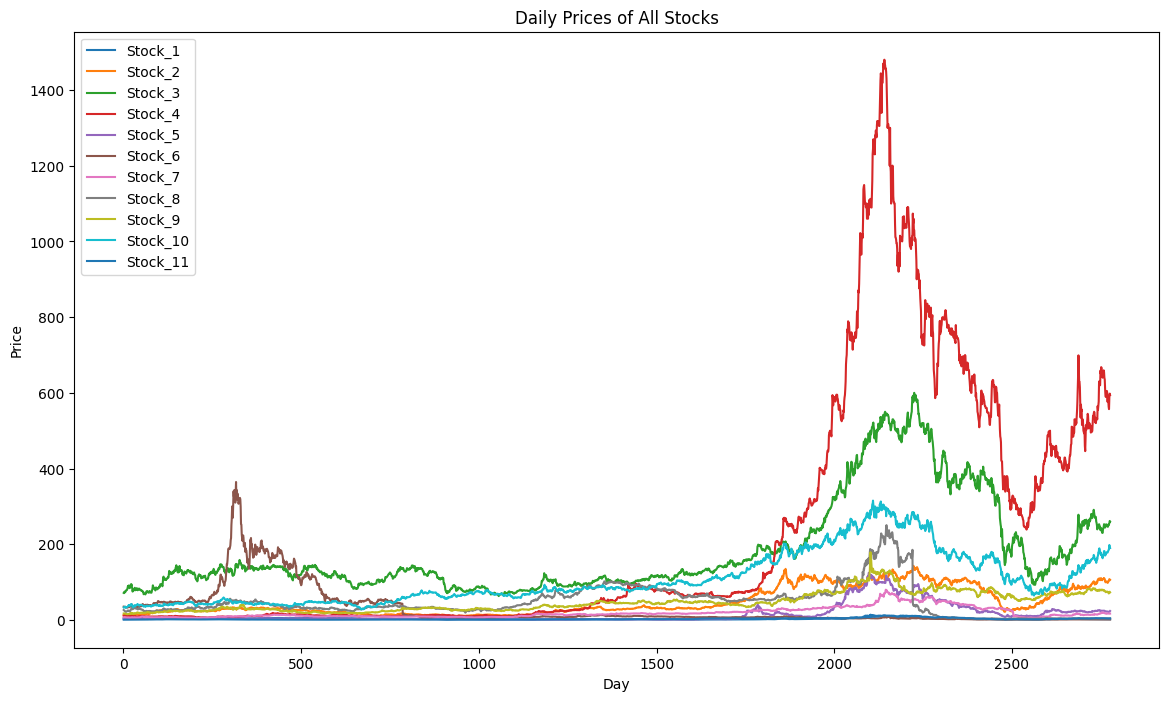

In [14]:
# Part 2: Plotting Daily Prices of All Stocks
plt.figure(figsize=(14, 8))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.title('Daily Prices of All Stocks')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend(loc="upper left")
plt.show()


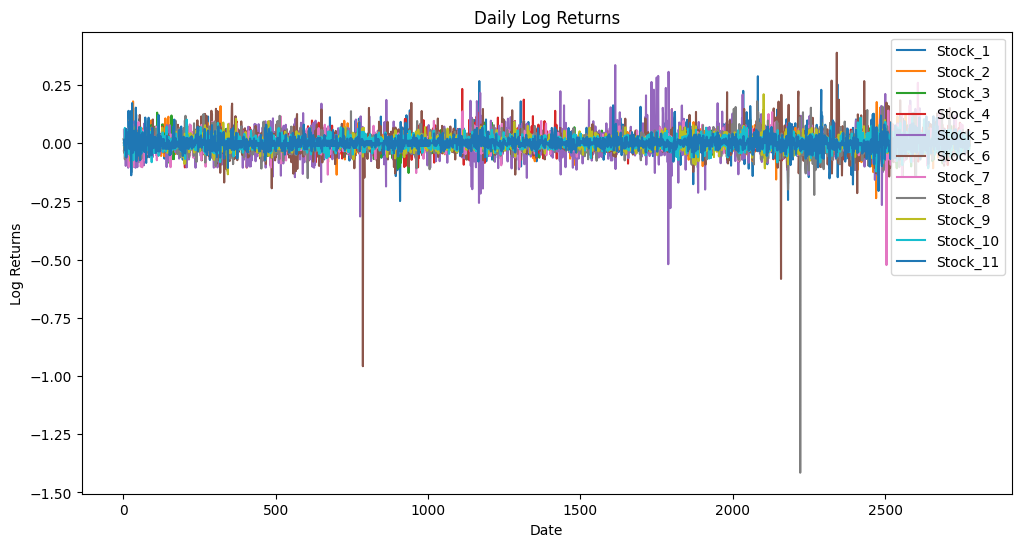

In [23]:
# Step 1: Calculate daily log returns
returns = np.log(data / data.shift(1)).dropna()

# Plot Daily Log Returns
plt.figure(figsize=(12, 6))
plt.plot(returns)
plt.title("Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.legend(returns.columns, loc='upper right')
plt.show()

In [15]:
# Part 3: Calculating Daily Returns and Displaying the Table
# Daily returns using the formula: (P_today / P_yesterday) - 1
daily_returns = data.pct_change().dropna()
daily_returns.head()


,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,Stock_11
Day,,,,,,,,,,,
2,0.000000,0.015748,0.020979,0.017544,0.000000,-0.008523,0.058824,-0.034221,0.000000,0.010241,0.014925
3,-0.015385,-0.007752,0.020548,0.034483,0.000000,0.000000,-0.013889,-0.039370,-0.011696,-0.010137,0.000000
4,-0.015625,0.015625,-0.026846,0.000000,0.000000,-0.005731,-0.014085,-0.016393,0.017751,-0.005422,-0.014706
5,0.031746,0.000000,0.034483,-0.033333,-0.044444,0.000000,-0.014286,-0.066667,-0.023256,0.067838,-0.029851
6,-0.030769,-0.007692,-0.006667,-0.017241,0.023256,-0.031700,0.007246,-0.026786,-0.011905,-0.053602,-0.030769


In [16]:
# Part 4: Calculating and Displaying Logarithmic Returns
# Logarithmic returns: log(P_today / P_yesterday)
log_returns = np.log(data / data.shift(1)).dropna()
log_returns.head()


,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,Stock_11
Day,,,,,,,,,,,
2,0.000000,0.015625,0.020762,0.017392,0.000000,-0.008559,0.057158,-0.034820,0.000000,0.010189,0.014815
3,-0.015504,-0.007782,0.020340,0.033902,0.000000,0.000000,-0.013986,-0.040166,-0.011765,-0.010189,0.000000
4,-0.015748,0.015504,-0.027213,0.000000,0.000000,-0.005747,-0.014185,-0.016529,0.017596,-0.005436,-0.014815
5,0.031253,0.000000,0.033902,-0.033902,-0.045462,0.000000,-0.014389,-0.068993,-0.023530,0.065636,-0.030305
6,-0.031253,-0.007722,-0.006689,-0.017392,0.022990,-0.032214,0.007220,-0.027151,-0.011976,-0.055092,-0.031253


In [17]:
# Part 5: Covariance Table
cov_matrix = log_returns.cov()
cov_matrix


,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,Stock_11
Stock_1,0.001247,0.000332,0.000276,0.000182,0.000308,0.000413,0.000142,0.000234,0.000207,0.000276,0.000232
Stock_2,0.000332,0.000881,0.000317,0.000131,0.000245,0.000353,0.000139,0.000186,0.000173,0.000322,0.000207
Stock_3,0.000276,0.000317,0.000680,0.000132,0.000215,0.000288,0.000100,0.000224,0.000154,0.000322,0.000198
Stock_4,0.000182,0.000131,0.000132,0.000779,0.000152,0.000155,0.000128,0.000080,0.000094,0.000132,0.000108
Stock_5,0.000308,0.000245,0.000215,0.000152,0.002259,0.000218,0.000159,0.000186,0.000124,0.000182,0.000181
Stock_6,0.000413,0.000353,0.000288,0.000155,0.000218,0.002071,0.000092,0.000227,0.000221,0.000287,0.000219
Stock_7,0.000142,0.000139,0.000100,0.000128,0.000159,0.000092,0.000853,0.000094,0.000100,0.000121,0.000110
Stock_8,0.000234,0.000186,0.000224,0.000080,0.000186,0.000227,0.000094,0.001738,0.000140,0.000159,0.000180
Stock_9,0.000207,0.000173,0.000154,0.000094,0.000124,0.000221,0.000100,0.000140,0.000581,0.000148,0.000127
Stock_10,0.000276,0.000322,0.000322,0.000132,0.000182,0.000287,0.000121,0.000159,0.000148,0.000608,0.000190


In [18]:
# Part 6: Correlation Table
corr_matrix = log_returns.corr()
corr_matrix


,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,Stock_11
Stock_1,1.000000,0.317230,0.300112,0.184325,0.183626,0.256752,0.137819,0.159136,0.242616,0.316628,0.240780
Stock_2,0.317230,1.000000,0.409167,0.158170,0.173757,0.261006,0.160406,0.149936,0.241632,0.440353,0.256391
Stock_3,0.300112,0.409167,1.000000,0.181353,0.173488,0.242421,0.131479,0.205773,0.244887,0.501192,0.278477
Stock_4,0.184325,0.158170,0.181353,1.000000,0.114307,0.121994,0.157329,0.068750,0.139069,0.192412,0.141369
Stock_5,0.183626,0.173757,0.173488,0.114307,1.000000,0.100563,0.114333,0.093706,0.108213,0.155076,0.139637
Stock_6,0.256752,0.261006,0.242421,0.121994,0.100563,1.000000,0.069553,0.119710,0.201246,0.255503,0.176422
Stock_7,0.137819,0.160406,0.131479,0.157329,0.114333,0.069553,1.000000,0.077387,0.142047,0.167924,0.137914
Stock_8,0.159136,0.149936,0.205773,0.068750,0.093706,0.119710,0.077387,1.000000,0.138863,0.154923,0.158734
Stock_9,0.242616,0.241632,0.244887,0.139069,0.108213,0.201246,0.142047,0.138863,1.000000,0.249217,0.192826
Stock_10,0.316628,0.440353,0.501192,0.192412,0.155076,0.255503,0.167924,0.154923,0.249217,1.000000,0.282395


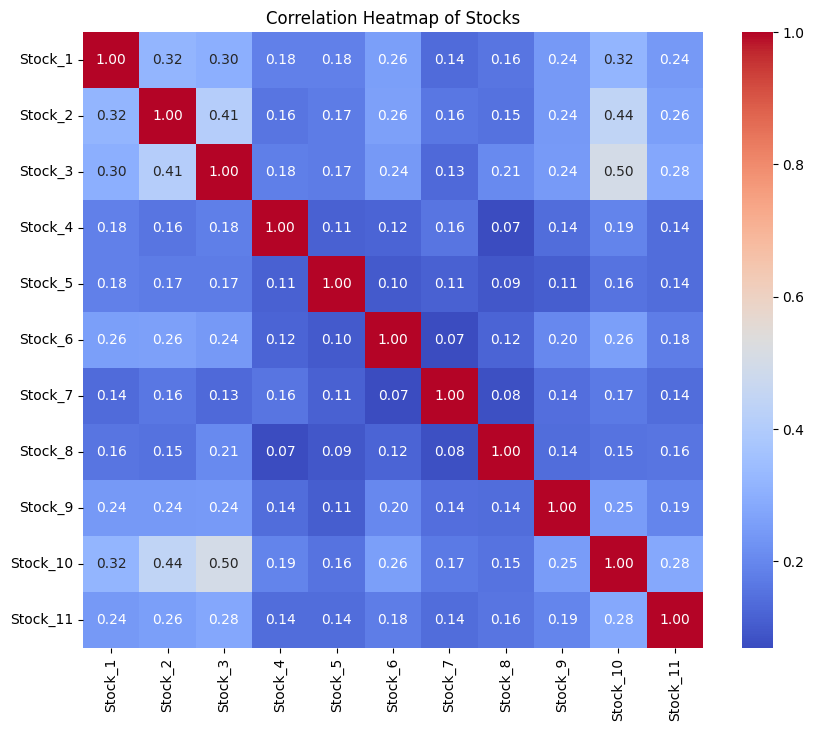

In [19]:
# Part 7: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Stocks")
plt.show()


In [20]:
# Part 8: Portfolio Optimization Functions
def portfolio_stats(weights):
    weights = np.array(weights)
    port_return = np.sum(log_returns.mean() * weights) * 252
    port_risk = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    return {'return': port_return, 'risk': port_risk, 'sharpe': port_return / port_risk}

def minimize_sharpe(weights): return -portfolio_stats(weights)['sharpe']
def minimize_risk(weights): return portfolio_stats(weights)['risk']

num_assets = len(log_returns.columns)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
bounds = tuple((0, 1) for _ in range(num_assets))

# Maximum Sharpe Ratio Portfolio
optimal_sharpe = minimize(minimize_sharpe, num_assets * [1. / num_assets], bounds=bounds, constraints=constraints)
print("Optimal Weights for Maximum Sharpe Ratio:", optimal_sharpe.x)

# Minimum Risk Portfolio
optimal_risk = minimize(minimize_risk, num_assets * [1. / num_assets], bounds=bounds, constraints=constraints)
print("Optimal Weights for Minimum Risk:", optimal_risk.x)

# Target Return Portfolio for Efficient Frontier
def target_return_optimization(target):
    def portfolio_for_target(weights): return (portfolio_stats(weights)['return'] - target) ** 2
    return minimize(portfolio_for_target, num_assets * [1. / num_assets], bounds=bounds, constraints=constraints)


Optimal Weights for Maximum Sharpe Ratio: [2.80119971e-16 1.14502258e-01 4.32081446e-17 5.29290129e-01
 1.44087043e-02 1.17695377e-16 0.00000000e+00 2.37942485e-17
 1.21110419e-01 8.71774688e-02 1.33511021e-01]
Optimal Weights for Minimum Risk: [0.00433577 0.03531262 0.08547244 0.16548403 0.02829732 0.0083976
 0.15097315 0.05206107 0.22000875 0.1162178  0.13343944]


In [21]:
# Part 9: Generating Efficient Frontier and Monte Carlo Simulation
target_returns = np.linspace(0.05, 0.35, 100)
minimal_risks = []
for target in target_returns:
    optimized = target_return_optimization(target)
    minimal_risks.append(np.sqrt(optimized.fun))

num_portfolios = 5000
portfolio_risks = []
portfolio_returns = []
for _ in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(num_assets), size=1).flatten()
    stats = portfolio_stats(weights)
    portfolio_risks.append(stats['risk'])
    portfolio_returns.append(stats['return'])


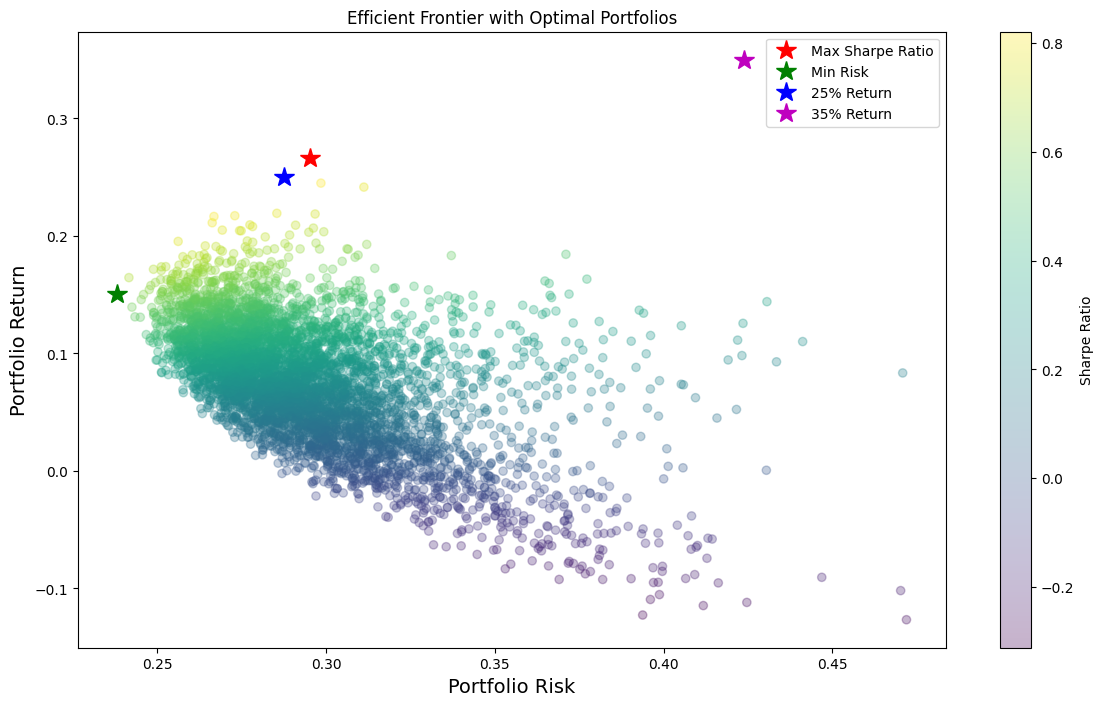

In [ ]:
# Part 10: Final Plot with Efficient Frontier and Portfolio Points
plt.figure(figsize=(14, 8))

# Scatter plot of simulated portfolios
plt.scatter(portfolio_risks, portfolio_returns, c=(np.array(portfolio_returns) / np.array(portfolio_risks)), marker='o', alpha=0.3)

# Efficient Frontier
# plt.plot(minimal_risks, target_returns, 'b--', linewidth=2, label='Efficient Frontier')

# Optimal portfolios
plt.plot(portfolio_stats(optimal_sharpe.x)['risk'], portfolio_stats(optimal_sharpe.x)['return'], 'r*', markersize=15, label='Max Sharpe Ratio')
plt.plot(portfolio_stats(optimal_risk.x)['risk'], portfolio_stats(optimal_risk.x)['return'], 'g*', markersize=15, label='Min Risk')

# Target portfolios
for target, color, label in zip([0.25, 0.35], ['b*', 'm*'], ['25% Return', '35% Return']):
    weights = target_return_optimization(target).x
    plt.plot(portfolio_stats(weights)['risk'], portfolio_stats(weights)['return'], color, markersize=15, label=label)

plt.xlabel('Portfolio Risk', fontsize=14)
plt.ylabel('Portfolio Return', fontsize=14)
plt.colorbar(label='Sharpe Ratio')
plt.legend()
plt.title('Efficient Frontier with Optimal Portfolios')
plt.show()
